In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pystan

%matplotlib inline
custom_style = {'axes.labelcolor': 'white',
                'xtick.color': 'white',
                'ytick.color': 'white'}
sns.set_style("darkgrid", rc=custom_style)
sns.set_context("notebook")
plt.style.use('dark_background')
np.random.seed(123)

In [3]:
df = pd.read_excel('notebook/data/data.xlsx')

In [4]:
df.head()

,0
0,3.896195
1,5.865766
2,5.860887
3,4.660614
4,5.263595


/Users/yugi/.pyenv/versions/anaconda-4.0.0/envs/py36/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


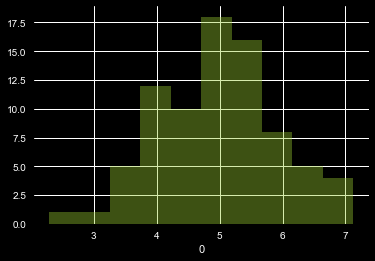

In [11]:
sns.distplot(df[0], kde=False, color='yellowgreen', bins=10)

In [14]:
stan_model="""

data{
    int N;
    real Y[N];
}

parameters {
    real mu;
    real<lower=0> sigma;
}

model {
    for(i in 1:N){
    Y[i] ~ normal(mu, sigma);
    }
}
"""

In [15]:
sm = pystan.StanModel(model_code=stan_model)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_4e11c9f9536495672c7148c2e4835837 NOW.


In [19]:
stan_data = {"N":df.shape[0], "Y":df[0]}

In [20]:
fit = sm.sampling(data=stan_data, iter=2000, chains=3, warmup=500, seed=123)

/Users/yugi/.pyenv/versions/anaconda-4.0.0/envs/py36/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [21]:
fit

Inference for Stan model: anon_model_4e11c9f9536495672c7148c2e4835837.
3 chains, each with iter=2000; warmup=500; thin=1; 
post-warmup draws per chain=1500, total post-warmup draws=4500.

        mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
mu      4.98  1.8e-3   0.11   4.76   4.91   4.98   5.05   5.19   3590    1.0
sigma   0.97  1.4e-3   0.08   0.83   0.92   0.97   1.02   1.14   3158    1.0
lp__  -37.06    0.02   1.01 -39.68 -37.45 -36.75 -36.35  -36.1   2071    1.0

Samples were drawn using NUTS at Wed Jul 18 23:25:21 2018.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).

In [32]:
fit.get_posterior_mean()

array([[  4.97769571,   4.981624  ,   4.97921119],
       [  0.97144914,   0.96949164,   0.97397496],
       [-37.05914921, -37.05948108, -37.07553446]])

In [31]:
fit.stansummary()

'Inference for Stan model: anon_model_4e11c9f9536495672c7148c2e4835837.\n3 chains, each with iter=2000; warmup=500; thin=1; \npost-warmup draws per chain=1500, total post-warmup draws=4500.\n\n        mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat\nmu      4.98  1.8e-3   0.11   4.76   4.91   4.98   5.05   5.19   3590    1.0\nsigma   0.97  1.4e-3   0.08   0.83   0.92   0.97   1.02   1.14   3158    1.0\nlp__  -37.06    0.02   1.01 -39.68 -37.45 -36.75 -36.35  -36.1   2071    1.0\n\nSamples were drawn using NUTS at Wed Jul 18 23:25:21 2018.\nFor each parameter, n_eff is a crude measure of effective sample size,\nand Rhat is the potential scale reduction factor on split chains (at \nconvergence, Rhat=1).'

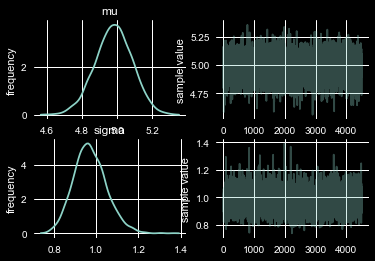

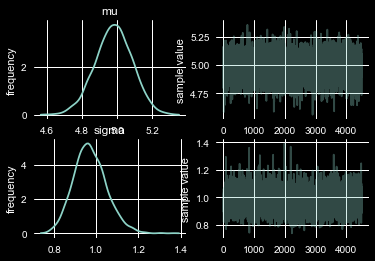

In [33]:
fit.plot()